# Massplanes

**Goal:** Quick nb that makes massplanes and caluclates yields by loading in the .h5 processed MNTs with a dask dataframe.

In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
from tqdm import tqdm
from glob import glob
import dask.dataframe as dd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import json
import time
import h5py
import uproot

import os
os.sys.path.append('../eda_tools')
from plot_helper import massplane

os.sys.path.append('../code')
from plotting import SR_x,SR_y1,SR_y2, CR_x, CR_y1, CR_y2, SB_x, SB_y1, SB_y2

%load_ext autoreload
%autoreload 2

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


Running w/ conda env: don't import root packages.


**Configs for running the notebook and saving the output**

In [2]:
pairing = 'MDR'
yr = 18

prodTag = 'FEB20'
nSelectedJets = 4

In [3]:
subDir = f'data{yr}_PFlow-{prodTag}'
if nSelectedJets > 4:
    subDir += f'-{nSelected}jets'

In [4]:
in_dir = f'../data/{subDir}/files'
dat_2b = dd.read_hdf(f'{in_dir}/df_period?_*_{pairing}_2b.h5', 'df', mode='r')
dat_3b = dd.read_hdf(f'{in_dir}/df_period?_*_{pairing}_3b.h5', 'df', mode='r')

**Let's make a little cutflow table too!**

In [5]:
# (dat_2b.ntag ==2).sum().compute()

In [6]:
# idx = ['4 jets','MDR','MDpT','deta_hh','X_wt','SR','VR','CR']
# cols = ['2b','3b','4b']

# df = pd.DataFrame(0,idx,cols)

In [7]:
# df.loc['4 jets', '2b'] = (dat_2b.ntag ==2).sum().compute()
# df.loc['MDR',    '2b'] = (dat_2b.MDR).sum().compute()
# df.loc['MDpT',   '2b'] = (dat_2b.MDR & dat_2b.MDpT).sum().compute()
# mask_2b = dat_2b.MDR & dat_2b.MDpT & ((dat_2b.eta_h1-dat_2b.eta_h2).abs() < 1.5)

# df.loc['deta_hh','2b'] =  mask_2b.sum().compute()
# df.loc['X_wt',   '2b'] = (mask_2b & (dat_2b.X_wt > 1.5)).compute()
# df.loc['SR',     '2b'] = (mask_2b & (dat_2b.X_wt > 1.5) & (dat_2b.kinematic_region == 0)).compute()
# df.loc['VR',     '2b'] = (mask_2b & (dat_2b.X_wt > 1.5) & (dat_2b.kinematic_region == 1)).compute()
# df.loc['CR',     '2b'] = (mask_2b & (dat_2b.X_wt > 1.5) & (dat_2b.kinematic_region == 2)).compute()

In [8]:
# df.loc['4 jets', '3b'] = ((dat_3b.ntag ==3) & (dat_3b.kinematic_region != 0)).sum().compute()
# df.loc['MDR',    '3b'] = ((dat_3b.ntag ==3) & (dat_3b.kinematic_region != 0) & dat_3b.MDR).sum().compute()
# df.loc['MDpT',   '3b'] = ((dat_3b.ntag ==3) & (dat_3b.kinematic_region != 0) & dat_3b.MDR & dat_3b.MDpT).sum().compute()
# mask_3b = (dat_3b.ntag ==3) & (dat_3b.kinematic_region != 0) & dat_3b.MDR & dat_3b.MDpT & ((dat_3b.eta_h1-dat_3b.eta_h2).abs() < 1.5)

# df.loc['deta_hh','3b'] =  mask_3b.sum().compute()
# df.loc['X_wt',   '3b'] = (mask_3b & (dat_3b.X_wt > 1.5)).compute()
# df.loc['VR',     '3b'] = (mask_3b & (dat_3b.X_wt > 1.5) & (dat_3b.kinematic_region == 1)).compute()
# df.loc['CR',     '3b'] = (mask_3b & (dat_3b.X_wt > 1.5) & (dat_3b.kinematic_region == 2)).compute()

In [9]:
# df.loc['4 jets', '4b'] = ((dat_3b.ntag >=4) & (dat_3b.kinematic_region != 0)).sum().compute()
# df.loc['MDR',    '4b'] = ((dat_3b.ntag >=4) & (dat_3b.kinematic_region != 0) & dat_3b.MDR).sum().compute()
# df.loc['MDpT',   '4b'] = ((dat_3b.ntag >=4) & (dat_3b.kinematic_region != 0) & dat_3b.MDR & dat_3b.MDpT).sum().compute()
# mask_4b = (dat_3b.ntag >=4) & (dat_3b.kinematic_region != 0) & dat_3b.MDR & dat_3b.MDpT & ((dat_3b.eta_h1-dat_3b.eta_h2).abs() < 1.5)

# df.loc['deta_hh','4b'] =  mask_4b.sum().compute()
# df.loc['X_wt',   '4b'] = (mask_4b & (dat_3b.X_wt > 1.5)).compute()
# df.loc['VR',     '4b'] = (mask_4b & (dat_3b.X_wt > 1.5) & (dat_3b.kinematic_region == 1)).compute()
# df.loc['CR',     '4b'] = (mask_4b & (dat_3b.X_wt > 1.5) & (dat_3b.kinematic_region == 2)).compute()

In [11]:
df_2b = dat_2b.loc[dat_2b.MDR & dat_2b.MDpT & ((dat_2b.eta_h1-dat_2b.eta_h2).abs() < 1.5), 
                   ['m_h1','m_h2','X_wt','m_hh','dRjj_1','dRjj_2','nValidPairs']].compute()
df_3b = dat_3b.loc[(dat_3b.kinematic_region != 0) & dat_3b.MDR & dat_3b.MDpT & ((dat_3b.eta_h1-dat_3b.eta_h2).abs() < 1.5), 
                   ['m_h1','m_h2','X_wt','ntag','m_hh','dRjj_1','dRjj_2','nValidPairs']].compute()

In [12]:
text = "$\mathbf{ATLAS}$ "+f"20{yr} data Internal\n"
text += f"{prodTag} MNT, DL1r 77% WP\n"
text += "MDR+$\min(D_{hh}$), MDpT, $|\Delta \eta_{hh}|$ < 1.5"

SR center: (120.0,110.0) GeV


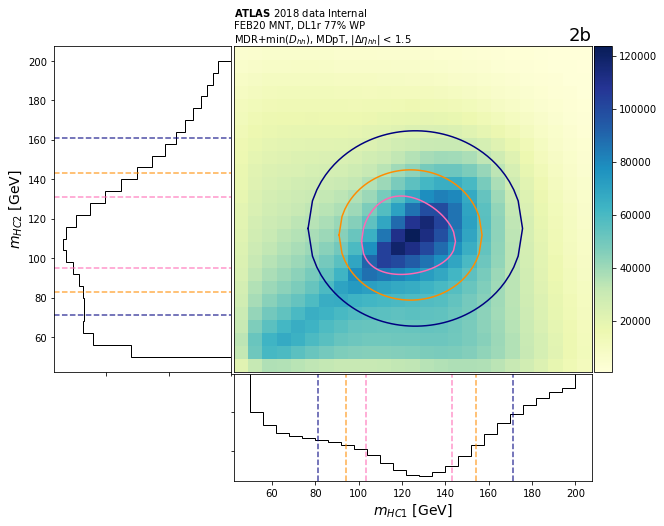

SR center: (120.0,110.0) GeV


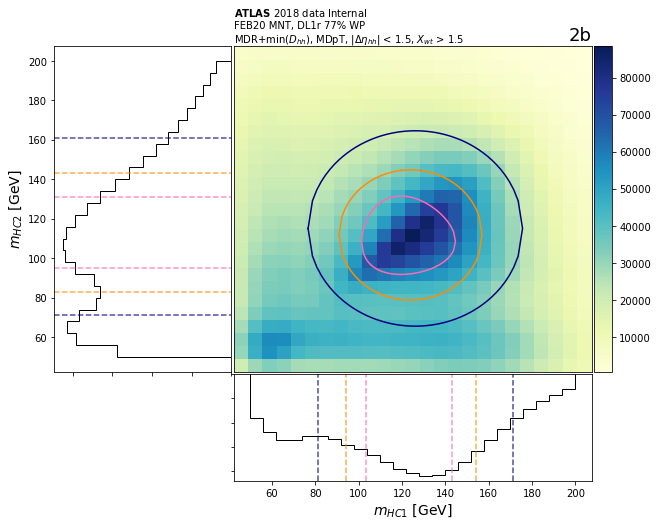

In [13]:
kwargs = {'figsize': (10, 8),
           'bins' : (25,25),
           'xrange': (50, 200),
           'yrange': (50, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': '2b',
           'text': text,
           'filename':f'figures/{subDir}/{pairing}/massplane_2b_deta_hh.pdf',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'alpha': 0.7,
           'save': True,
           'show': True,
          }

fig = massplane(df_2b,**kwargs)

kwargs['text'] = text +', $X_{wt}$ > 1.5'
kwargs['filename'] = f'figures/{subDir}/{pairing}/massplane_2b_Xwt.pdf'

fig = massplane(df_2b[df_2b.X_wt > 1.5],**kwargs)

And now for 4b (and 3b)?

SR center: (120.0,110.0) GeV


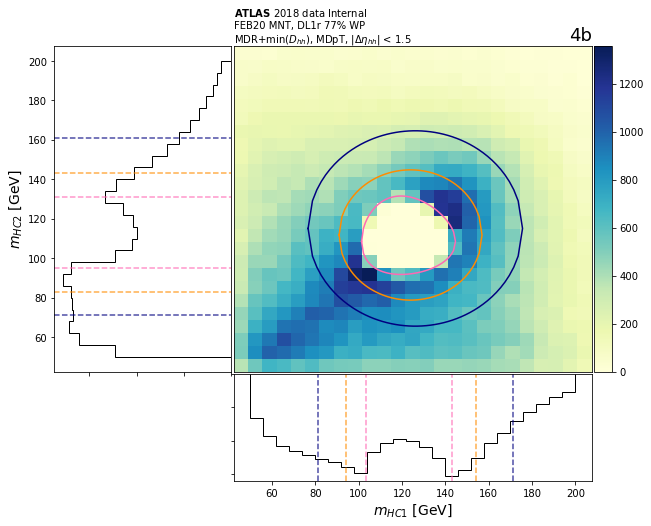

SR center: (120.0,110.0) GeV


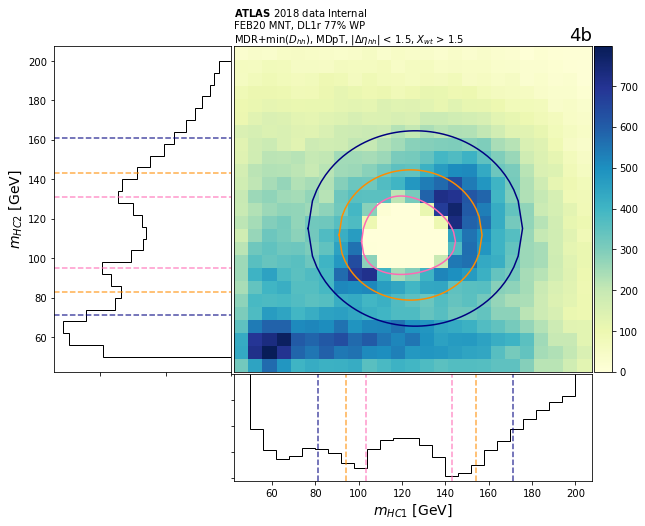

In [14]:
kwargs['title'] = '4b'
kwargs['text'] = text
kwargs['filename'] = f'figures/{subDir}/{pairing}/massplane_4b_Xwt.pdf'

fig = massplane(df_3b[df_3b.ntag >= 4],**kwargs)

kwargs['text'] = text +', $X_{wt}$ > 1.5'
kwargs['filename'] = f'figures/{subDir}/{pairing}/massplane_4b_Xwt.pdf'

fig = massplane(df_3b[(df_3b.ntag >= 4) & (df_3b.X_wt > 1.5)],**kwargs)

SR center: (120.0,110.0) GeV


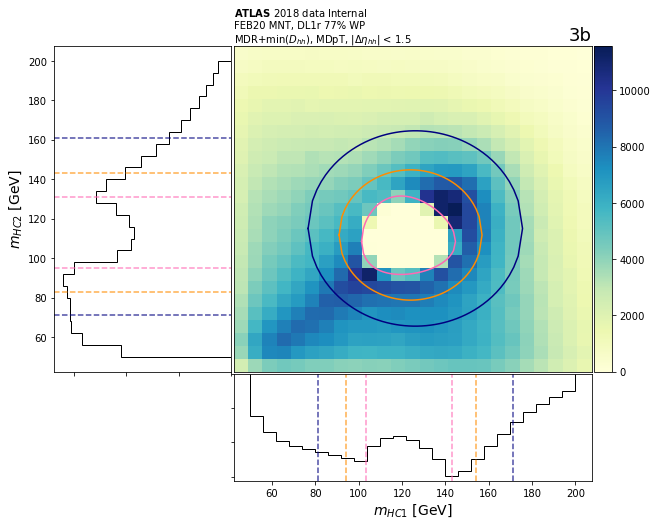

SR center: (120.0,110.0) GeV


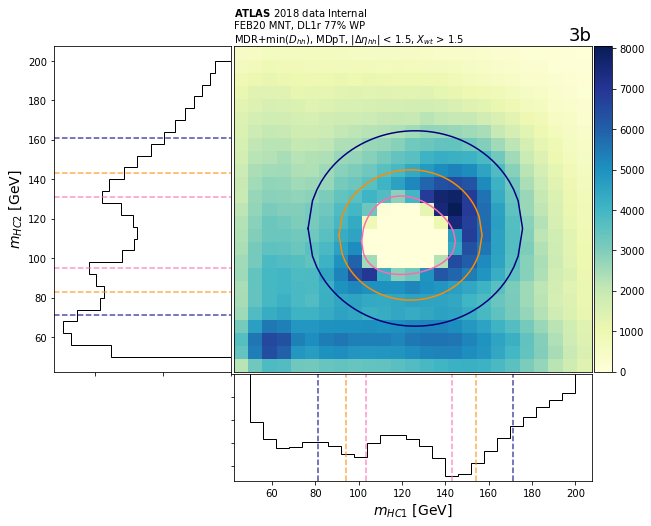

In [15]:
kwargs['title'] = '3b'
kwargs['text'] = text
kwargs['filename'] = f'figures/{subDir}/{pairing}/massplane_3b_Xwt.pdf'

fig = massplane(df_3b[df_3b.ntag == 3],**kwargs)

kwargs['text'] = text +', $X_{wt}$ > 1.5'
kwargs['filename'] = f'figures/{subDir}/{pairing}/massplane_3b_Xwt.pdf'

fig = massplane(df_3b[(df_3b.ntag == 3) & (df_3b.X_wt > 1.5)],**kwargs)

It might be fun to make a 3x3 plot with the valid pairings?

In [16]:
shortText = "$\mathbf{ATLAS}$ "+f"20{yr} data Internal\n"
shortText += f"{prodTag} MNT, DL1r 77% WP\n"
shortText += "MDR+$\min(D_{hh})$, all cuts"

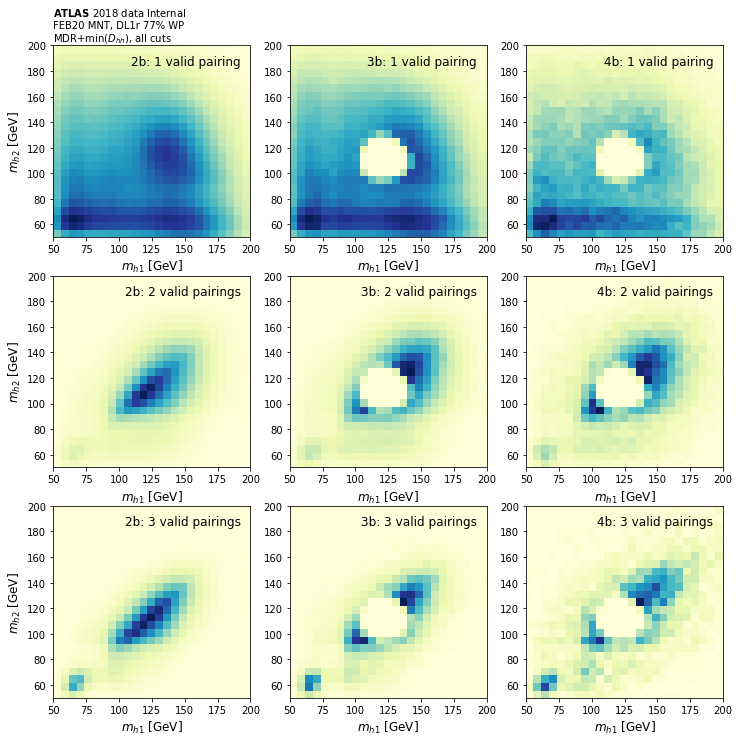

In [17]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

for vp,axs in zip([1,2,3],axes):

    
    # 2b
    axs[0].hist2d(*df_2b.loc[(df_2b.X_wt > 1.5)&(df_2b.nValidPairs==vp),['m_h1','m_h2']].values.T,
                  25,[[50, 200],[50, 200]],cmap='YlGnBu')
    
    # 3b
    axs[1].hist2d(*df_3b.loc[(df_3b.X_wt > 1.5)&(df_3b.nValidPairs==vp)&(df_3b.ntag==3),['m_h1','m_h2']].values.T,
                  25,[[50, 200],[50, 200]],cmap='YlGnBu')
    
    # 4b
    axs[2].hist2d(*df_3b.loc[(df_3b.X_wt > 1.5)&(df_3b.nValidPairs==vp)&(df_3b.ntag>=4),['m_h1','m_h2']].values.T,
                  25,[[50, 200],[50, 200]],cmap='YlGnBu')
    
    s = 's' if vp > 1 else''
    for ax,ntag in zip(axs,[2,3,4]):
        ax.set_xlabel('$m_{h1}$ [GeV]',fontsize=12)
        ax.text(.95,.95,f'{ntag}b: {vp} valid pairing{s}',transform=ax.transAxes,
                ha='right',va='top',fontsize=12)
    axs[0].set_ylabel('$m_{h2}$ [GeV]',fontsize=12)
        
# axes[0,0].text('2b',loc='right',fontsize=15)
# axes[0,1].set_title('3b',loc='right',fontsize=15)
# axes[0,2].set_title('4b',loc='right',fontsize=15)

axes[0,0].text(0,1,shortText,ha='left',va='bottom',transform=axes[0,0].transAxes)

plt.savefig(f'figures/{subDir}/{pairing}/massplanes_validPairings_Xwt.pdf')

plt.show()

### Pairing / background sculpting follow-up

While everything is still loaded, I'm a little curious about if the cut Todd + I proposed to separate out the background proportions is the same as the valid pairings categories

In [18]:
df_2b['Xhh'] = np.sqrt( (10*(df_2b.m_h1-120)/df_2b.m_h1)**2 + (10*(df_2b.m_h2-120)/df_2b.m_h2)**2 )
df_2b['dR_ratio'] = df_2b['dRjj_1'] / df_2b['dRjj_2']

In [19]:
xx = np.linspace(200,500)
yy = 1 - (xx-275)/150

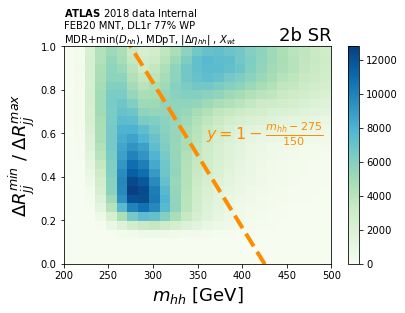

In [20]:
mask_2b = (df_2b.Xhh<1.6) & (df_2b.X_wt > 1.5)
plt.hist2d(df_2b.loc[mask_2b,'m_hh'], df_2b.loc[mask_2b,'dR_ratio'], 
           25, [(200,500),(0,1)], cmap='GnBu')

plt.plot(xx,yy,linewidth=4,ls='--',color='darkorange')


plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
plt.ylabel('$\Delta R_{jj}^{min}$ / $\Delta R_{jj}^{max}$',fontsize=18)
plt.colorbar()
plt.title('2b SR',fontsize=18,loc='right')
ax = plt.gca()
ax.text(0,1,text[:-5]+', $X_{wt}$',ha='left',va='bottom',transform=ax.transAxes)
ax.text(.97, .6, r'$y = 1 - \frac{m_{hh} - 275}{150}$',ha='right',va='center',
        fontsize=16,transform=ax.transAxes,color='darkorange')

plt.savefig(f'figures/{subDir}/{pairing}/dR_ratio_vs_m_hh_Xwt_2b_SR.pdf')

plt.show()

In [21]:
m_up = df_2b.dR_ratio > 1 - (df_2b.m_hh-275)/150
m_dn = df_2b.dR_ratio < 1 - (df_2b.m_hh-275)/150

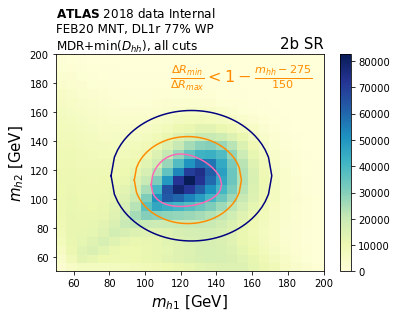

In [22]:
plt.hist2d(*df_2b.loc[m_dn,['m_h1','m_h2']].values.T, 25, [[50, 200],[50, 200]],cmap='YlGnBu')
plt.colorbar()

plt.xlabel('$m_{h1}$ [GeV]',fontsize=15)
plt.ylabel('$m_{h2}$ [GeV]',fontsize=15)
plt.title('2b SR',fontsize=15,loc='right')

ax = plt.gca()
ax.text(0,1, shortText, transform=ax.transAxes, ha='left',va='bottom', fontsize=12)

ax.text(.96, .96, r'$\frac{\Delta R_{min} }{ \Delta R_{max}} < 1 - \frac{m_{hh} - 275}{150}$',
        ha='right', va='top', fontsize=16,
        transform=ax.transAxes,color='darkorange')

plt.plot(np.hstack([SR_x,SR_x[::-1]]), np.hstack([SR_y1,SR_y2[::-1]]), 'hotpink')
plt.plot(np.hstack([CR_x,CR_x[::-1]]), np.hstack([CR_y1,CR_y2[::-1]]), 'darkorange')
plt.plot(np.hstack([SB_x,SB_x[::-1]]), np.hstack([SB_y1,SB_y2[::-1]]), 'navy')

plt.savefig(f'figures/{subDir}/{pairing}/massplane_2b_SR_dR_cut_dn.pdf',bbox_inches='tight')
plt.show()

In [23]:
dn = np.histogram(df_2b.loc[m_dn,'nValidPairs'],3,(.5,3.5),density=True)[0]
dn

array([0.44763732, 0.44810054, 0.10426215])

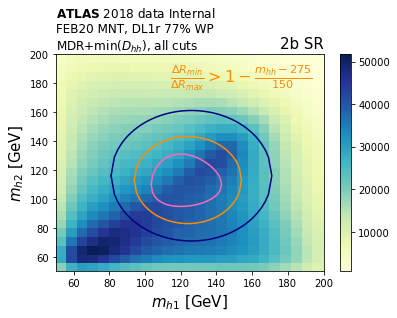

In [24]:
plt.hist2d(*df_2b.loc[m_up,['m_h1','m_h2']].values.T, 25, [[50, 200],[50, 200]],cmap='YlGnBu')
plt.colorbar()

plt.xlabel('$m_{h1}$ [GeV]',fontsize=15)
plt.ylabel('$m_{h2}$ [GeV]',fontsize=15)
plt.title('2b SR',fontsize=15,loc='right')

ax = plt.gca()
ax.text(0,1, shortText, transform=ax.transAxes, ha='left',va='bottom', fontsize=12)

ax.text(.96, .96, r'$\frac{\Delta R_{min} }{ \Delta R_{max}} > 1 - \frac{m_{hh} - 275}{150}$',
        ha='right', va='top', fontsize=16,
        transform=ax.transAxes,color='darkorange')

plt.plot(np.hstack([SR_x,SR_x[::-1]]), np.hstack([SR_y1,SR_y2[::-1]]), 'hotpink')
plt.plot(np.hstack([CR_x,CR_x[::-1]]), np.hstack([CR_y1,CR_y2[::-1]]), 'darkorange')
plt.plot(np.hstack([SB_x,SB_x[::-1]]), np.hstack([SB_y1,SB_y2[::-1]]), 'navy')

plt.savefig(f'figures/{subDir}/{pairing}/massplane_2b_SR_dR_cut_up.pdf',bbox_inches='tight')
plt.show()

In [25]:
up = np.histogram(df_2b.loc[m_up,'nValidPairs'],3,(.5,3.5),density=True)[0]
up

array([0.89784094, 0.09946648, 0.00269259])

In [26]:
pd.DataFrame(np.vstack([dn,up]).T, [f'{vp} valid pairs' for vp in [1,2,3]],['down','up'])

down        up
1 valid pairs  0.447637  0.897841
2 valid pairs  0.448101  0.099466
3 valid pairs  0.104262  0.002693